### 필요한 모델 임포트

In [1]:
import torch
from torch import nn

import matplotlib.pyplot as plt
from torchdyn.models import NeuralODE

### 초기값, 시간범위 지정

In [2]:

# 중력 가속도
g = 9.81

# 초기 위치와 속도
h0 = 10.0
v0 = 5.0

# 시간 범위
t = torch.linspace(0, 2, 100)


### FINN + NeuralODE 적용한 신경망 모델

In [3]:
class ODEFunc(nn.Module):
    def forward(self, t, y):
        h, v = torch.split(y,1,dim=1)
        # 공의 속도
        dhdt = v
        # 중력에 의한 속도변화(torch.ones_like는 텐서의 값이다.)
        dvdt = -g * torch.ones_like(h)
        return torch.cat((dhdt, dvdt), dim=1)


# 신경망 모델
neural_ode = NeuralODE(ODEFunc(), sensitivity='adjoint', solver='dopri5').to('cpu')

# 초기 조건
y0 = torch.tensor([[h0, v0]])

# 시뮬레이션
solution = neural_ode.trajectory(y0, t)


Your vector field does not have `nn.Parameters` to optimize.


### 결과 그래프로 도출

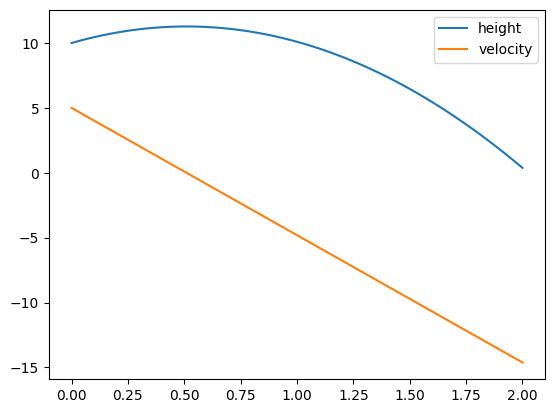

In [4]:
# 결과 그리기
plt.plot(t.detach(), solution[:, 0, 0].detach(), label='height')
plt.plot(t.detach(), solution[:, 0, 1].detach(), label='velocity')
plt.legend()
plt.show()